# Group Comparsion

In [1]:
import pandas as pd

mlb = pd.read_csv('mlb.csv')

In [2]:
mlb.head()

,name,team,position,height,weight,age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [3]:
mlb.shape

(1034, 6)

In [4]:
mlb.describe()

,height,weight,age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


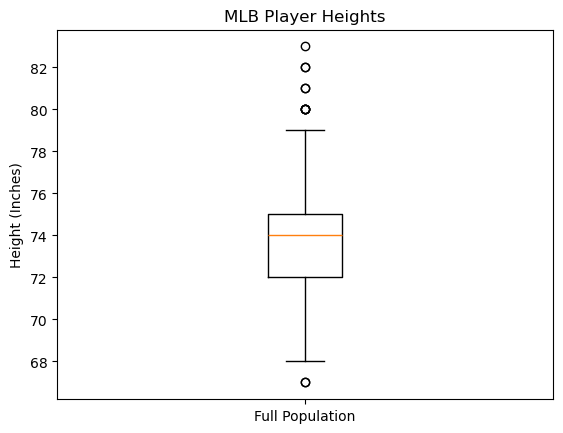

In [5]:
import matplotlib.pyplot as plt
plt.boxplot([mlb['height']])
plt.ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1],['Full Population'])
plt.show()

In [6]:
sample1 = mlb.sample(n=30,random_state=8675309)
sample2 = mlb.sample(n=30,random_state=1729)

In [7]:
sample3 = [71,72,73,74,74,76,75,75,75,76,75,77,76,75,77,76,75,76,76,75,75,81,77,75,77,77,75,75]

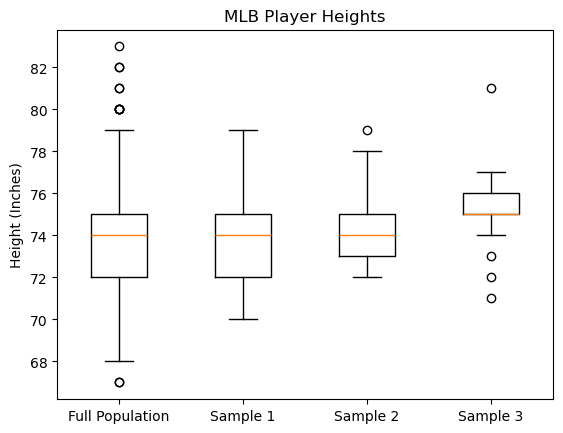

In [10]:
import numpy as np
plt.boxplot([mlb['height'],sample1['height'],sample2['height'],np.array(sample3)])
plt.ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1,2,3,4],['Full Population','Sample 1','Sample 2','Sample 3'])
plt.show()

In [11]:
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))

73.8
74.36666666666666
75.39285714285714


## Differences between Sample Data

In [12]:
alldifferences=[]
for i in range(1000):
    newsample1=mlb.sample(n=30,random_state=i*2)
    newsample2=mlb.sample(n=30,random_state=i*2+1)
    alldifferences.append(newsample1['height'].mean()-newsample2['height'].mean())

print(alldifferences[0:10])

[0.8333333333333286, -0.30000000000001137, -0.10000000000000853, -0.1666666666666572, 0.06666666666667709, -0.9666666666666686, 0.7999999999999972, 0.9333333333333371, -0.5333333333333314, -0.20000000000000284]


/tmp/ipykernel_4729/3675138921.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(alldifferences).set_title("Differences Between Sample Means")


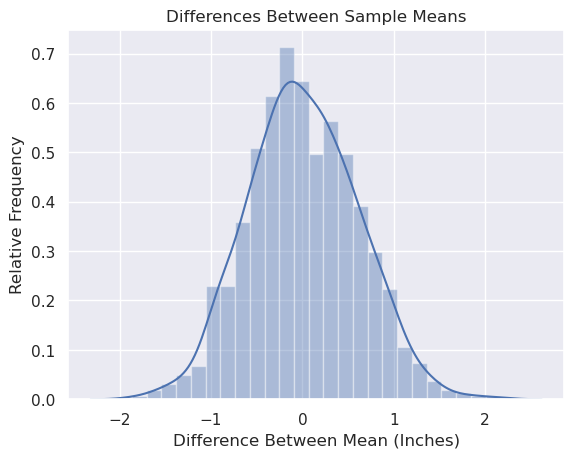

In [13]:
import seaborn as sns
sns.set()
ax=sns.distplot(alldifferences).set_title("Differences Between Sample Means")
plt.xlabel('Difference Between Mean (Inches)')
plt.ylabel('Relative Frequency')
plt.show()

In [14]:
largedifferences=[diff for diff in alldifferences if abs(diff) >= 1.6]
print(len(largedifferences))

8


In [15]:
smalldifferences=[diff for diff in alldifferences if abs(diff) >= 0.6]
print(len(smalldifferences))

314


## The t-Test

In [16]:
import scipy.stats
scipy.stats.ttest_ind(sample1['height'],sample2['height'])

TtestResult(statistic=-1.0839563860213952, pvalue=0.2828695892305152, df=58.0)

In [19]:
scipy.stats.mannwhitneyu(sample1['height'],sample2['height'])

MannwhitneyuResult(statistic=392.0, pvalue=0.38913738408151577)